Datu ielasīšana, priekšapstrāde un sākotnējā atspoguļošana
---



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importējam datus un apskatam dažas no to vērtībām.

In [5]:
datu_kopa = pd.read_csv('wines.csv')
datu_kopa.head()
# pandas funkcija

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Info par datu kopas kolonnu datu tipiem

In [6]:
datu_kopa.info()
# pandas funkcija

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malicacid                     178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  0d280_0d315_of_diluted_wines  178 non-null    float64
 13  proli

In [7]:
print(datu_kopa.head(7))

   class  alcohol  malicacid   ash  alcalinity_of_ash  magnesium  \
0      1    14.23       1.71  2.43               15.6        127   
1      1    13.20       1.78  2.14               11.2        100   
2      1    13.16       2.36  2.67               18.6        101   
3      1    14.37       1.95  2.50               16.8        113   
4      1    13.24       2.59  2.87               21.0        118   
5      1    14.20       1.76  2.45               15.2        112   
6      1    14.39       1.87  2.45               14.6         96   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39 

### Kopsavilkuma statistika

In [8]:
datu_kopa.describe()
# pandas funkcija

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Datu normalizācija

In [9]:
numeric_columns = datu_kopa.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'class']  # Exclude the 'class' column

for column in numeric_columns:
    datu_kopa[column] = (datu_kopa[column] - datu_kopa[column].min()) / (datu_kopa[column].max() - datu_kopa[column].min())

print(datu_kopa.head(10))
print(datu_kopa.describe())

   class   alcohol  malicacid       ash  alcalinity_of_ash  magnesium  \
0      1  0.842105   0.191700  0.572193           0.257732   0.619565   
1      1  0.571053   0.205534  0.417112           0.030928   0.326087   
2      1  0.560526   0.320158  0.700535           0.412371   0.336957   
3      1  0.878947   0.239130  0.609626           0.319588   0.467391   
4      1  0.581579   0.365613  0.807487           0.536082   0.521739   
5      1  0.834211   0.201581  0.582888           0.237113   0.456522   
6      1  0.884211   0.223320  0.582888           0.206186   0.282609   
7      1  0.797368   0.278656  0.668449           0.360825   0.554348   
8      1  1.000000   0.177866  0.433155           0.175258   0.293478   
9      1  0.744737   0.120553  0.486631           0.278351   0.304348   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283    

Datu un faktoru vērtību vizualizācija
---

### Vērtību attēlojums

<Axes: >

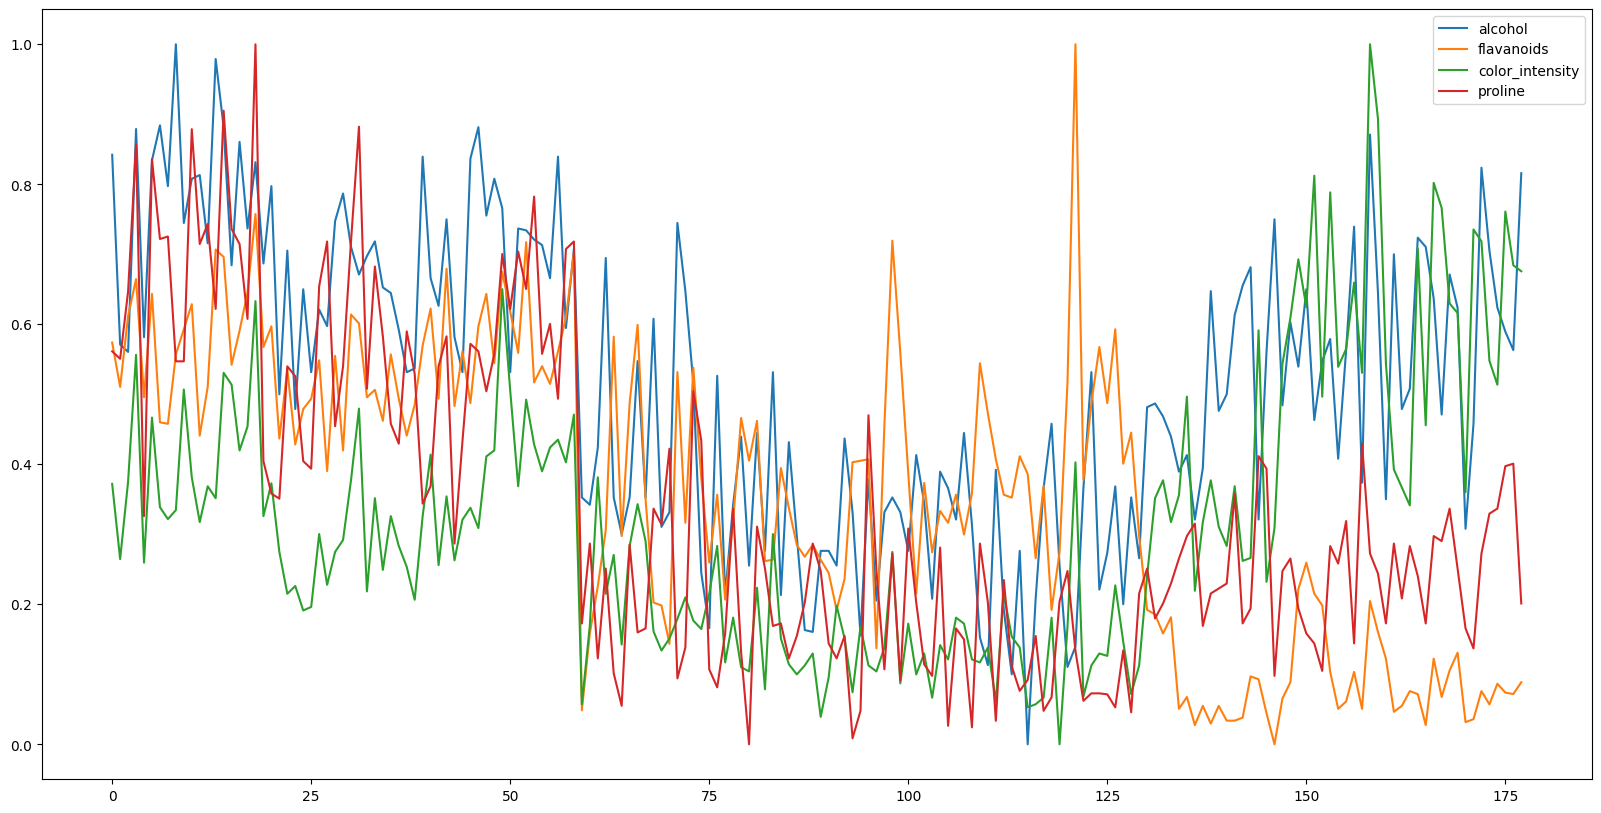

In [10]:
datu_kopa_vizualizacijai = datu_kopa[['alcohol', 'flavanoids', 'color_intensity', 'proline']]


datu_kopa_vizualizacijai.plot(figsize=(20,10))

### Histogrammas

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'flavanoids'}>],
       [<Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'proline'}>]], dtype=object)

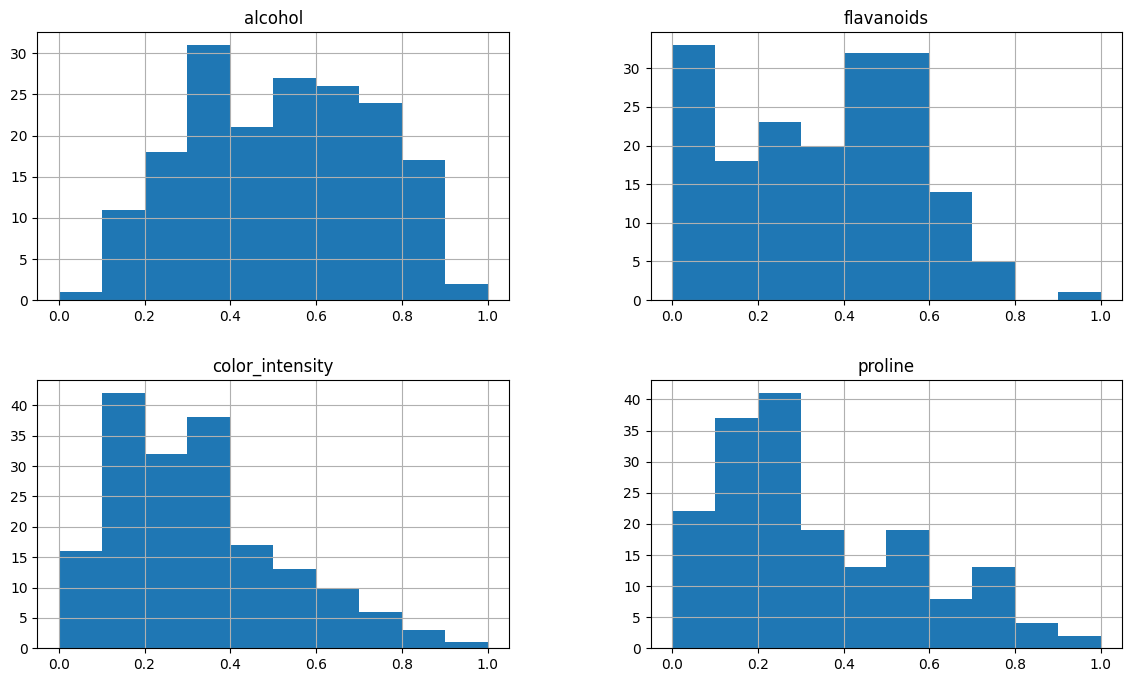

In [11]:
selected_vars = ['alcohol', 'flavanoids', 'color_intensity', 'proline']
datu_kopa[selected_vars].hist(figsize=(14,8))

### Izkliedes diagrammu analīze (Atribūtu savstarpējie sadalījumi)


Text(0.5, 0.98, 'Faktoru savstarpējās attiecības')

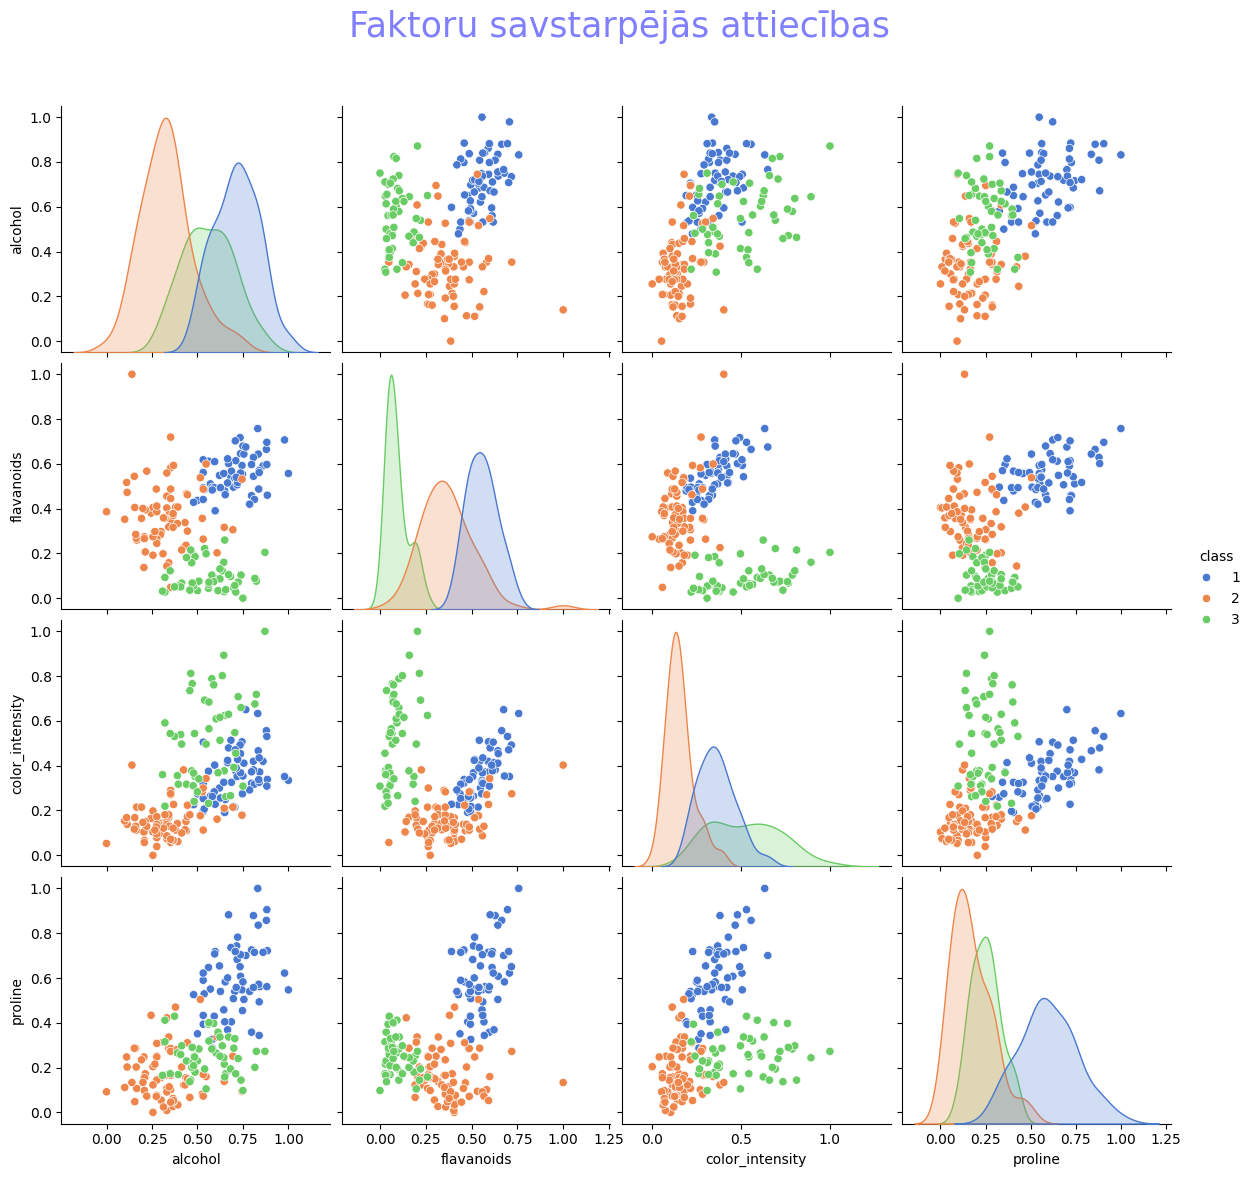

In [12]:
paru_grafiks = sns.pairplot(datu_kopa, 
                           hue='class',
                           palette="muted",
                           height=3,
                           vars=['alcohol', 'flavanoids', 'color_intensity', 'proline'],
                           kind='scatter')

plt.subplots_adjust(top=0.9)

paru_grafiks.fig.suptitle('Faktoru savstarpējās attiecības', fontsize=25, color='b', alpha=0.5)

### Atribūtu savstarpējā korelācija

<Axes: >

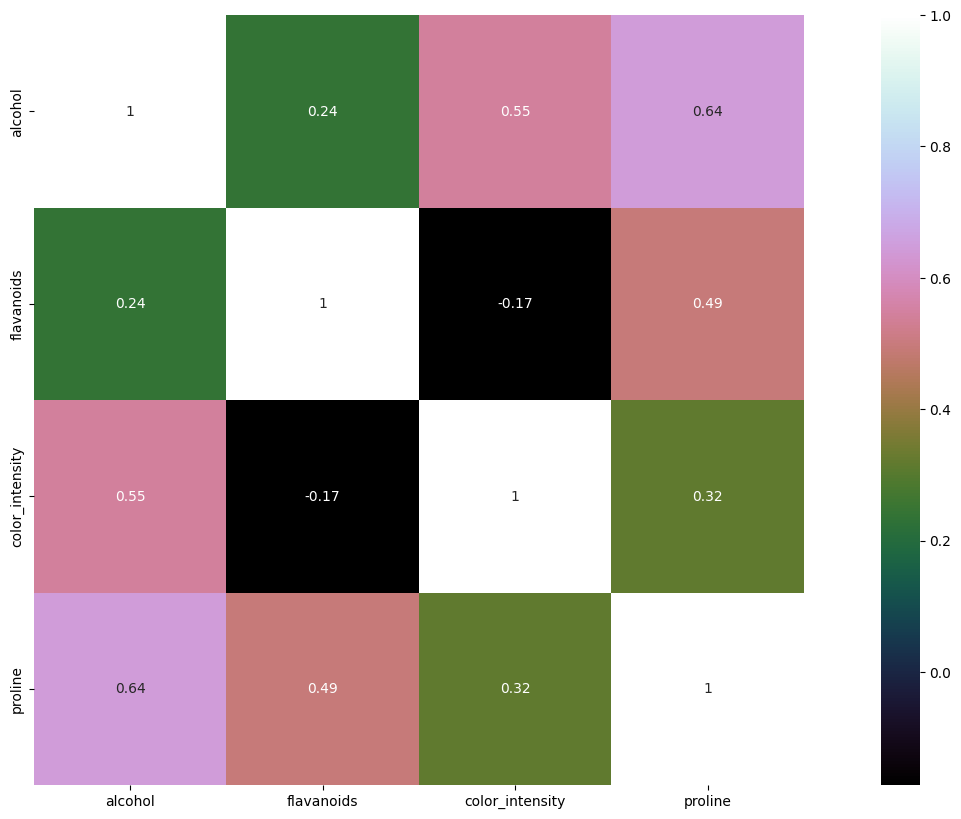

In [13]:
selected_vars = ['alcohol', 'flavanoids', 'color_intensity', 'proline']

korelacijas_matrica = datu_kopa[selected_vars].corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(korelacijas_matrica, 
            vmax=1, 
            square=True, 
            annot=True, 
            cmap='cubehelix')

K-vidējo algoritms
---

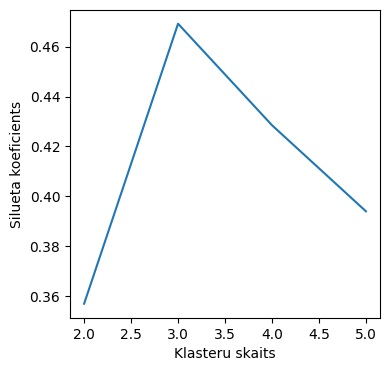

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

darba_datu_kopa_klasterizacijai_3_pazimes = datu_kopa[['alcohol', 'flavanoids', 'color_intensity']]

Silueta_koeficients = []

for i in range(2,6):
    kmeans_modelis = KMeans(n_clusters = i, init = "k-means++")
    kmeans_modelis.fit(darba_datu_kopa_klasterizacijai_3_pazimes)
    Silueta_koeficients.append(metrics.silhouette_score(darba_datu_kopa_klasterizacijai_3_pazimes, kmeans_modelis.labels_))

plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silueta_koeficients)
plt.xlabel('Klasteru skaits')
plt.ylabel('Silueta koeficients')
plt.show()

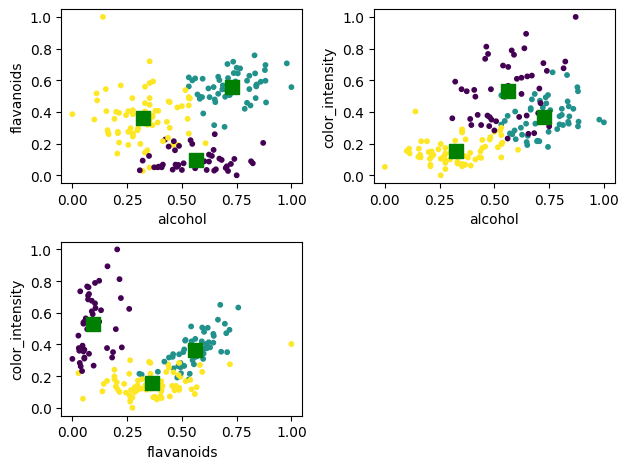

In [15]:
import matplotlib.pyplot as plt

kmeans_modelis = KMeans(n_clusters=3, init="k-means++").fit(darba_datu_kopa_klasterizacijai_3_pazimes)

centroids = kmeans_modelis.cluster_centers_

ypred = kmeans_modelis.predict(darba_datu_kopa_klasterizacijai_3_pazimes)

plt.subplot(2,2,1)  
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['alcohol'], 
           darba_datu_kopa_klasterizacijai_3_pazimes['flavanoids'], 
           s=10, c=ypred)
plt.scatter(centroids[0,0], centroids[0,1], s=100, c='g', marker='s')
plt.scatter(centroids[1,0], centroids[1,1], s=100, c='g', marker='s')
plt.scatter(centroids[2,0], centroids[2,1], s=100, c='g', marker='s')
plt.xlabel('alcohol')
plt.ylabel('flavanoids')

plt.subplot(2,2,2)  
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['alcohol'], 
           darba_datu_kopa_klasterizacijai_3_pazimes['color_intensity'], 
           s=10, c=ypred)
plt.scatter(centroids[0,0], centroids[0,2], s=100, c='g', marker='s')
plt.scatter(centroids[1,0], centroids[1,2], s=100, c='g', marker='s')
plt.scatter(centroids[2,0], centroids[2,2], s=100, c='g', marker='s')
plt.xlabel('alcohol')
plt.ylabel('color_intensity')

plt.subplot(2,2,3)  
plt.scatter(darba_datu_kopa_klasterizacijai_3_pazimes['flavanoids'], 
           darba_datu_kopa_klasterizacijai_3_pazimes['color_intensity'], 
           s=10, c=ypred)
plt.scatter(centroids[0,1], centroids[0,2], s=100, c='g', marker='s')
plt.scatter(centroids[1,1], centroids[1,2], s=100, c='g', marker='s')
plt.scatter(centroids[2,1], centroids[2,2], s=100, c='g', marker='s')
plt.xlabel('flavanoids')
plt.ylabel('color_intensity')

plt.tight_layout()
plt.show()